In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
924,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2
925,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
926,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.90,2
927,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,2
928,33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         929 non-null    int64  
 1   Gender                      929 non-null    object 
 2   Total_Bilirubin             929 non-null    float64
 3   Direct_Bilirubin            929 non-null    float64
 4   Alkaline_Phosphotase        929 non-null    int64  
 5   Alamine_Aminotransferase    929 non-null    int64  
 6   Aspartate_Aminotransferase  929 non-null    int64  
 7   Total_Protiens              929 non-null    float64
 8   Albumin                     929 non-null    float64
 9   Albumin_and_Globulin_Ratio  921 non-null    float64
 10  Dataset                     929 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 80.0+ KB


Text(0, 0.5, 'Frequency')

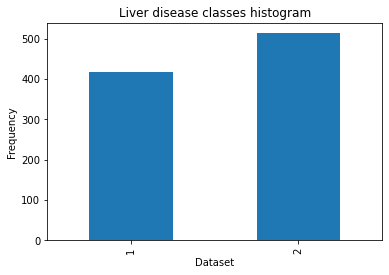

In [5]:
count_classes = pd.value_counts(data['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")


In [6]:
data['Dataset'] = data['Dataset'].map({2:0,1:1}) 

** Check from the website: 416 liver disease patients and 167 normal patients**

In [7]:
data['Dataset'].value_counts()

0    513
1    416
Name: Dataset, dtype: int64

Now I filled in the missing values with zeros

In [8]:
data['Albumin_and_Globulin_Ratio'].fillna(value=0, inplace=True)

In [9]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,43.356297,2.493864,1.079010,264.137783,63.361679,84.097955,6.508827,3.217008,0.967998,0.447793
std,16.602836,5.063380,2.307199,212.945194,147.182975,232.278533,1.073640,0.794737,0.320795,0.497535
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,0.000000
25%,32.000000,0.700000,0.200000,168.000000,22.000000,23.000000,5.800000,2.700000,0.800000,0.000000
50%,43.000000,0.900000,0.200000,198.000000,31.000000,35.000000,6.600000,3.200000,1.000000,0.000000
75%,57.000000,1.800000,0.800000,279.000000,52.000000,66.000000,7.200000,3.900000,1.110000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


** From the table above as the ranges are different for different features, feature scaling has to be performed **

In [11]:
data["Gender"].replace("Male",1,inplace=True)
data["Gender"].replace("Female",0,inplace=True)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


** To look at the correlations between the features heatmap with corr() function is helpful **

<AxesSubplot:title={'center':'Pearson Correlation of liver disease Features'}>

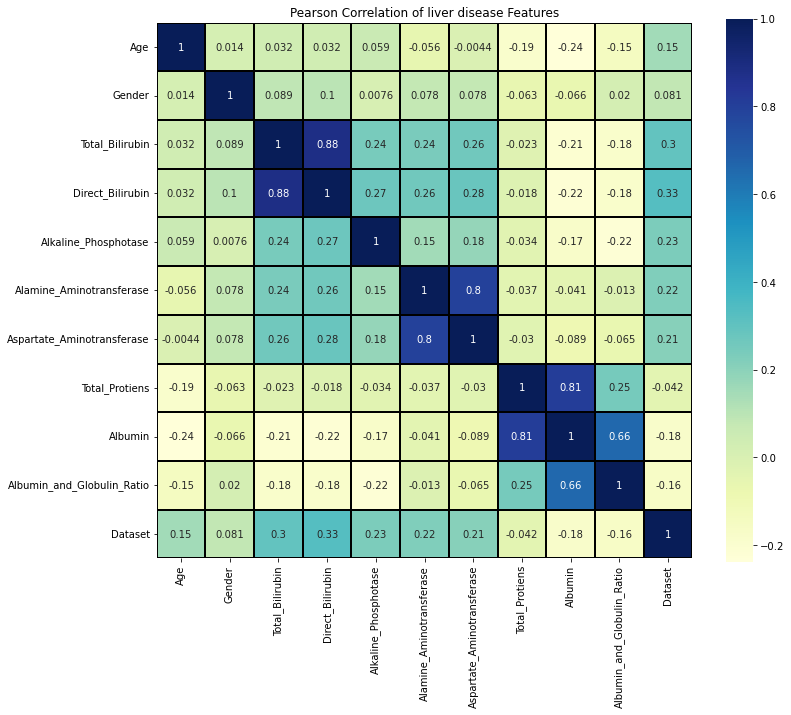

In [12]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')
sns.heatmap(data.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

from this we can see that **Direct_Bilirubin ** and ** Total_Bilirubin**; ** Alamine Aminotransferase ** and ** Aspartate Aminotransferase**; ** Total Protiens **  and ** Albumin** are highly correlated.

**Now i use just SVC for the dataset without using any sampling techniques just to check how it performs**

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [14]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
X=data[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]
y=data['Dataset'] 
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
924,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50
925,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20
926,64,1,0.9,0.3,310,61,58,7.0,3.4,0.90
927,25,1,0.6,0.1,183,91,53,5.5,2.3,0.70


In [16]:
len(Y_train[Y_train==0])/len(Y_train[Y_train==1])

1.1852941176470588

In [17]:
len(Y_test[Y_test==0])/len(Y_test[Y_test==1])

1.4473684210526316

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR=LogisticRegression()

In [19]:
LR.fit(X_train,Y_train)

/home/divum/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
lp_y_pred= LR.predict(X_test) 

In [21]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(lp_y_pred,Y_test) 

In [22]:
cm

array([[99, 39],
       [11, 37]])

In [23]:
print("Accuracy score for Logistic Regression: ",accuracy_score(lp_y_pred,Y_test))

Accuracy score for Logistic Regression:  0.7311827956989247


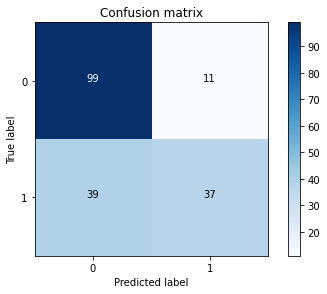

In [24]:
lg_cm = confusion_matrix(Y_test,lp_y_pred)
np.set_printoptions(precision=2)

# print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(lg_cm
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [25]:
print("Recall metric in the testing dataset: ", lg_cm[1,1]/(lg_cm[1,0]+lg_cm[1,1]))

Recall metric in the testing dataset:  0.4868421052631579


In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(Y_test,lp_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       110
           1       0.77      0.49      0.60        76

    accuracy                           0.73       186
   macro avg       0.74      0.69      0.70       186
weighted avg       0.74      0.73      0.72       186



# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier  

In [29]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=3)  
classifier.fit(X_train, Y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=3)

In [30]:
y_pred= classifier.predict(X_test) 

In [31]:
print("Accuracy score for Decision Tree : ",accuracy_score(Y_test,y_pred))

Accuracy score for Decision Tree :  0.8924731182795699


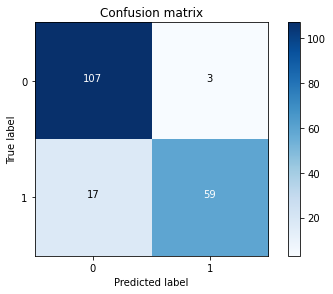

In [32]:
dt_cm = confusion_matrix(Y_test,y_pred)
np.set_printoptions(precision=2)

# print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(dt_cm
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [33]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       110
           1       0.95      0.78      0.86        76

    accuracy                           0.89       186
   macro avg       0.91      0.87      0.88       186
weighted avg       0.90      0.89      0.89       186



In [34]:
print("Recall metric in the testing dataset: ", dt_cm[1,1]/(dt_cm[1,0]+dt_cm[1,1]))

Recall metric in the testing dataset:  0.7763157894736842


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier


In [36]:
rfclf = RandomForestClassifier(max_depth=2, random_state=0)

In [37]:
rfclf.fit(X_train, Y_train) 

RandomForestClassifier(max_depth=2, random_state=0)

In [38]:
y_pred_rf= rfclf.predict(X_test) 

In [39]:
print("Accuracy score for random forest : ",accuracy_score(Y_test,y_pred_rf))

Accuracy score for random forest :  0.7419354838709677


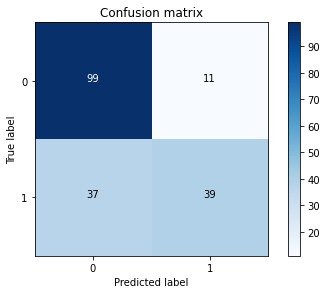

In [40]:
rf_cm = confusion_matrix(Y_test,y_pred_rf)
np.set_printoptions(precision=2)

# print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(rf_cm
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [41]:
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       110
           1       0.78      0.51      0.62        76

    accuracy                           0.74       186
   macro avg       0.75      0.71      0.71       186
weighted avg       0.75      0.74      0.73       186



# knn

In [42]:
from sklearn.neighbors import KNeighborsClassifier 
knn_classifier = KNeighborsClassifier(n_neighbors =21, metric = 'minkowski') 
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=21)

In [43]:
knn_y_pred = knn_classifier.predict(X_test)

In [44]:
print("Accuracy score for KNN : ",accuracy_score(Y_test,knn_y_pred))

Accuracy score for KNN :  0.7150537634408602


# SVC

In [45]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [46]:
svm_y_pred = svm_classifier.predict(X_test)

In [47]:
print("Accuracy score for SVC : ",accuracy_score(Y_test,svm_y_pred))

Accuracy score for SVC :  0.7150537634408602


<AxesSubplot:>

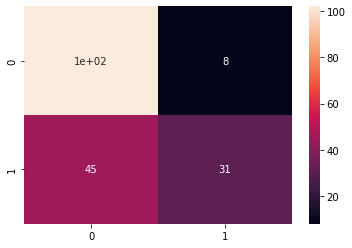

In [48]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(Y_test, svm_y_pred)
sns.heatmap(svm_cm , annot=True)

# model saving

In [49]:
import pickle

In [53]:
filename = 'final_Model'
outfile = open(filename,'wb')

In [54]:
pickle.dump(classifier,outfile)